# Part II - Understanding Bike Share Patterns
## by Fouad Mesbah

## Investigation Overview


This analysis explores usage patterns of the Ford GoBike system with a focus on three main questions:

1. Who uses the system? (Subscribers vs. Customers)  
2. When are the bikes most frequently used? (time of day, weekdays vs. weekends)  
3. How are the bikes used? (trip durations and riding habits)  

The overarching theme is to contrast the behaviors of Subscribers, who are typically commuters, with Customers, who are more casual riders.  
This framing will guide the visual exploration and explanatory analysis.



## Dataset Overview and Executive Summary

The dataset used in this analysis comes from the Ford GoBike bike-sharing system.  
It contains detailed information about individual trips, including:

- Trip duration (in seconds, converted to minutes for analysis)  
- Start and end times of rides  
- Start and end stations  
- User information: type of rider (Subscriber or Customer), gender, and year of birth  

This rich dataset allows us to explore how different groups of users engage with the system, and how usage varies across time.

### Key Findings

- **Trip durations:** Most rides are short (under 20 minutes), but Customers tend to ride longer than Subscribers.  
- **Time-of-day patterns:** Clear commuter peaks appear around 8–9 AM and 5–6 PM on weekdays.  
- **Weekday vs. Weekend:** Subscribers dominate weekday usage, while Customers are more active on weekends.  
- **User segmentation:**  
  - Subscribers use the system frequently for short, routine commutes.  
  - Customers use it occasionally, often for longer leisure rides.  

Together, these insights highlight the dual role of the system: a practical commuting tool during the week and a leisure option on weekends.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")

## Distribution of User Types

The majority of trips are made by Subscribers, showing that the service is mainly used for regular commuting. Customers represent a smaller share, likely casual or one-time users.

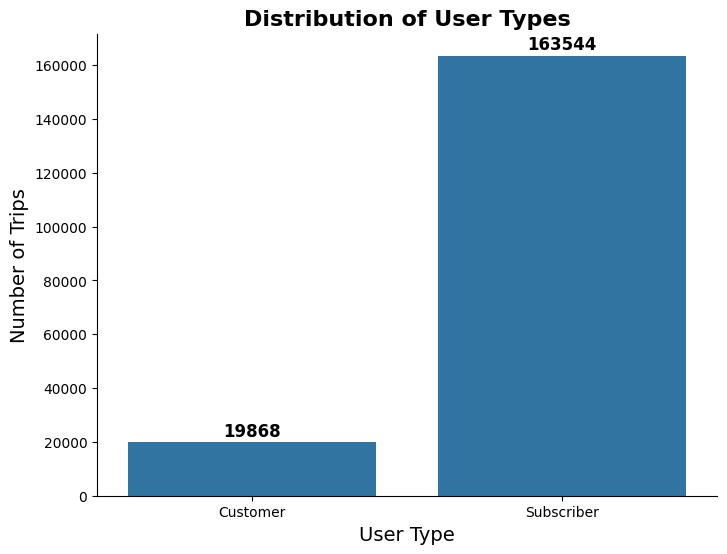

In [3]:
# Recreation of the distribution of user types plot, with the addition of annotations
plt.figure(figsize=(8,6))

sns.countplot(
    data=df,
    x="user_type",
    color="tab:blue"
)
plt.title("Distribution of User Types", fontsize=16, weight="bold")
plt.xlabel("User Type", fontsize=14)
plt.ylabel("Number of Trips", fontsize=14)

for p in plt.gca().patches:
    plt.gca().annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=12, weight='bold', color='black'
    )

sns.despine()
plt.show()

## Ride Frequency by Weekday and Start Hour

The heatmap clearly highlights two strong usage peaks: morning (around 7–9 AM) and evening (around 4–6 PM) during weekdays, consistent with commuting patterns. Usage drops significantly on weekends, suggesting less reliance on the service for work-related trips.

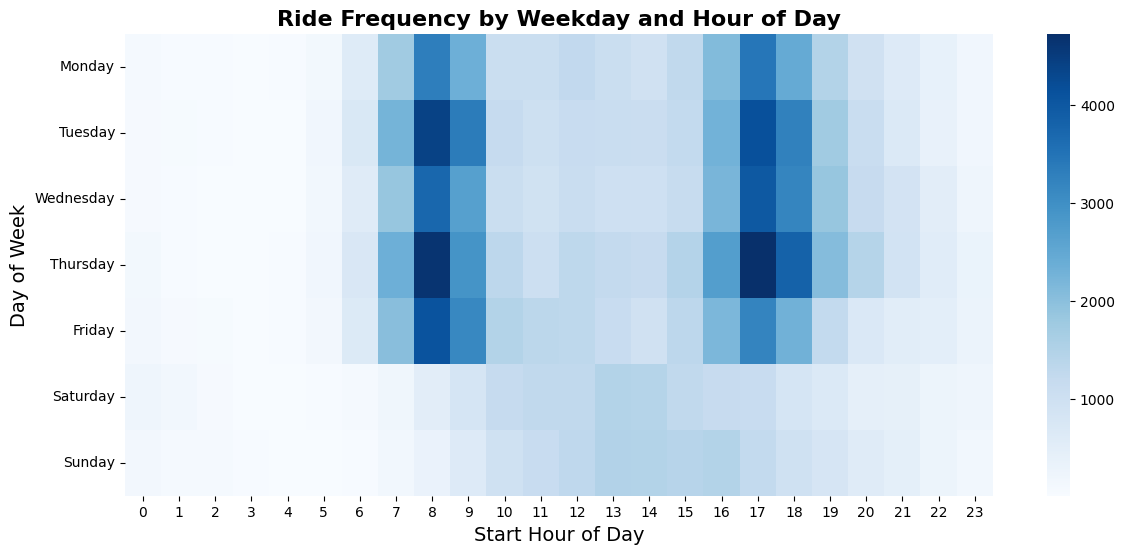

In [4]:
# Recreation of the ride frequency by weekday and hour of day heatmap

df['duration_min'] = df['duration_sec'] / 60
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour
df['weekday'] = pd.to_datetime(df['start_time']).dt.day_name()

heatmap_data = df.pivot_table(
    index='weekday',
    columns='start_hour',
    values='duration_min',
    aggfunc='count'
)

weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heatmap_data = heatmap_data.reindex(weekday_order)

plt.figure(figsize=(14,6))
sns.heatmap(
    heatmap_data,
    cmap="Blues",
)

plt.title("Ride Frequency by Weekday and Hour of Day", fontsize=16, weight="bold")
plt.xlabel("Start Hour of Day", fontsize=14)
plt.ylabel("Day of Week", fontsize=14)

plt.show()

## Average Trip Duration by Weekday and User Type

On average, Customers take longer trips compared to Subscribers across all days, especially during weekends. This suggests Subscribers mainly use the service for short, routine commutes, while Customers use it more for leisure or occasional, longer rides.

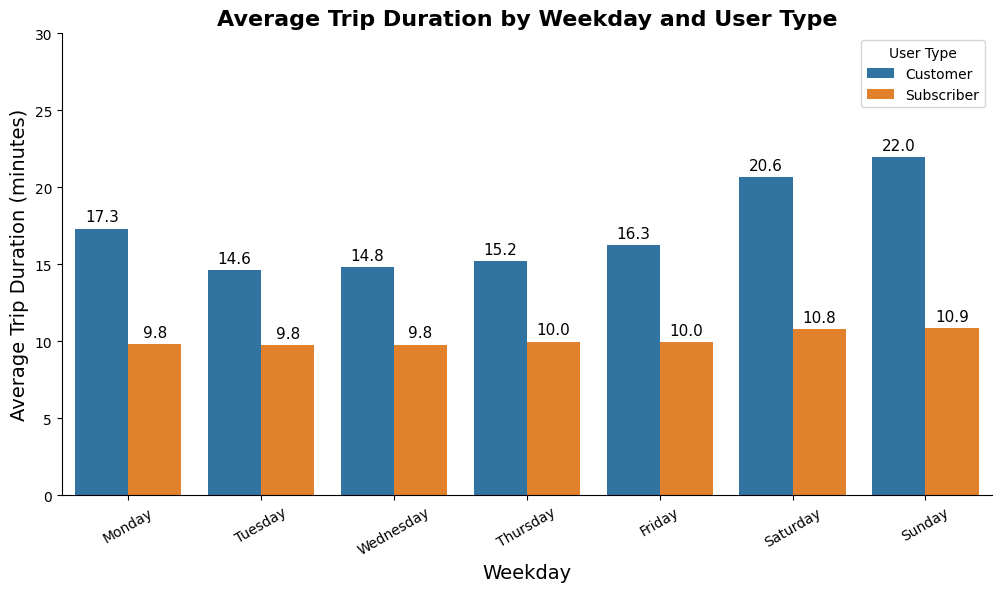

In [5]:
# Recreation of the average trip duration by weekday and user type plot, with the addition of annotations

avg_dur = (df[df['duration_min'] <= 120]  
           .groupby(['weekday','user_type'])['duration_min']
           .mean()
           .reset_index())
avg_dur['weekday'] = pd.Categorical(avg_dur['weekday'], categories=weekday_order, ordered=True)
avg_dur = avg_dur.sort_values('weekday')

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=avg_dur,
    x='weekday', y='duration_min', hue='user_type'
)

plt.title("Average Trip Duration by Weekday and User Type", fontsize=16, weight='bold')
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Average Trip Duration (minutes)", fontsize=14)
plt.ylim(0, 30)
plt.xticks(rotation=30)
plt.legend(title="User Type")

for c in ax.containers:
    ax.bar_label(c, fmt='%.1f', padding=3, fontsize=11, color='black')

sns.despine()
plt.show()